In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [20]:
df=pd.read_csv('Airbnb Dataset 19.csv')


In [ ]:
#Data cleaning was done on the initial dataset using Excel 
#Last review date in the dataset did not have proper formatting
#The data in the format DD/MM/YYY was converted into proper date format by converting text-to-columns using / separator. Then Date formula (=DATE(YEAR,MONTH,DATE)) was used to enter the correct date format
#The price given in the data is total price for the minimum nights, so a separate column was created with price per night.


In [30]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,price_per_night,number_of_reviews,last_review_cleaned,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,149.000000,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,225.000000,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,50.000000,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,89.000000,270,07-05-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,8.000000,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,61492,Exclusive Room with Private Bath in LES,297769,Tunji,Manhattan,Chinatown,40.71445,-73.99080,Private room,120,4,30.000000,171,23-06-2019,1.80,2,353
245,61509,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,0.550000,92,30-04-2019,0.90,1,140
246,62095,BK Sweet Suite w/Kitchen&FullBath,281764,Colette&Sean,Brooklyn,East Flatbush,40.64446,-73.95030,Entire home/apt,65,3,21.666667,238,14-06-2019,2.30,1,2
247,62427,Great East Village Apartment Rental,303882,Brie,Manhattan,East Village,40.72680,-73.99079,Entire home/apt,130,50,2.600000,56,26-05-2019,0.58,1,56


In [21]:
df.dtypes



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
price_per_night                   float64
number_of_reviews                   int64
last_review_cleaned                object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [19]:
df['neighbourhood_group']=df['neighbourhood_group'].astype('category')
df['room_type']=df['room_type'].astype('category')
# To enable category plotting, the neighbourhood group and room type are converted to category type

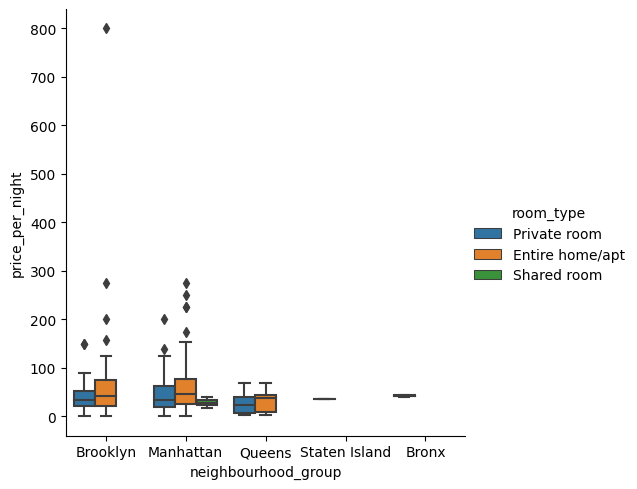

In [32]:
sns.catplot(y='price_per_night',x='neighbourhood_group',hue='room_type',data=df,kind='box')
#This plot shows the average prices in different neighbourhood groups for different types of rooms
#It can be seen that there is an outlier with value of 800

In [36]:
index_to_be_dropped = df[df['price_per_night']==800].index
print(index_to_be_dropped)
df_without_outlier=df.drop(index_to_be_dropped)

# Here the outlier of 800 is dropped for better visualisation

Index([85], dtype='int64')


In [47]:
df.iloc[index_to_be_dropped]
#This shows the details we are dropping

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,price_per_night,number_of_reviews,last_review_cleaned,reviews_per_month,calculated_host_listings_count,availability_365
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,800.0,25,08-04-2016,0.24,1,7


<Axes: xlabel='neighbourhood_group', ylabel='price_per_night'>

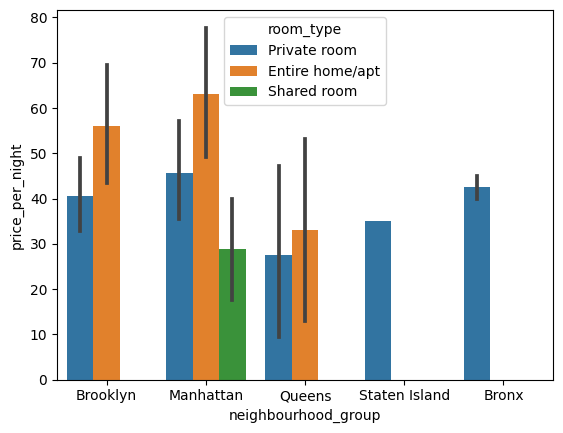

In [86]:
sns.barplot(y='price_per_night',x='neighbourhood_group',hue='room_type',data=df_without_outlier)
# This shows the average prices in each of the neighbourhood, room type wise after dropping the outlier

<Axes: xlabel='room_type', ylabel='count'>

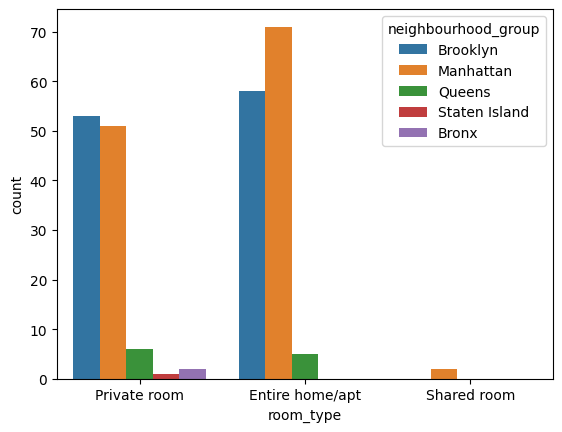

In [39]:
sns.countplot(x='room_type',hue='neighbourhood_group',data=df)
#This plot shows the type of rooms distibution in different localities

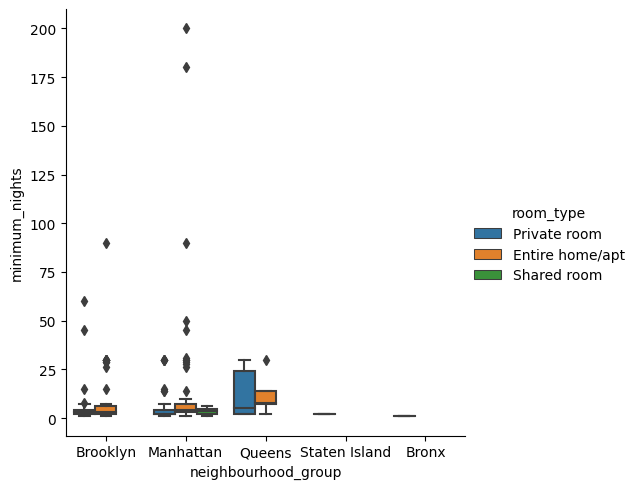

In [40]:
sns.catplot(y='minimum_nights',x='neighbourhood_group',hue='room_type',data=df_without_outlier,kind='box')
#This shows the minimum nights criteria, but there are outliers which prevent clear visualtion, so we need to drop them 

In [51]:
index_to_be_dropped_min_nights=df[df['minimum_nights']>100].index
df_min_night_cleaned=df.drop(index_to_be_dropped_min_nights)
index_to_be_dropped_min_nights
print(df.iloc[61])
print(df.iloc[245])


id                                                             15396
name                              Sunny & Spacious Chelsea Apartment
host_id                                                        60278
host_name                                                      Petra
neighbourhood_group                                        Manhattan
neighbourhood                                                Chelsea
latitude                                                    40.74623
longitude                                                   -73.9953
room_type                                            Entire home/apt
price                                                            375
minimum_nights                                                   180
price_per_night                                             2.083333
number_of_reviews                                                  5
last_review_cleaned                                       11-03-2018
reviews_per_month                 

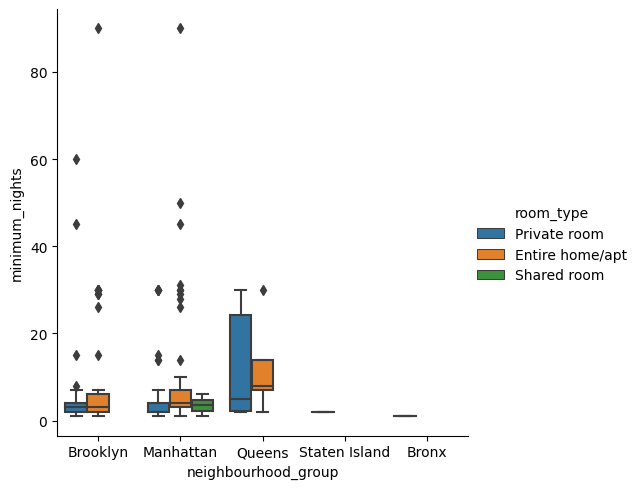

In [72]:
sns.catplot(y='minimum_nights',x='neighbourhood_group',hue='room_type',data=df_min_night_cleaned,kind='box')
# This shows the minimum nights criterion distibution in different localities and by room type

<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

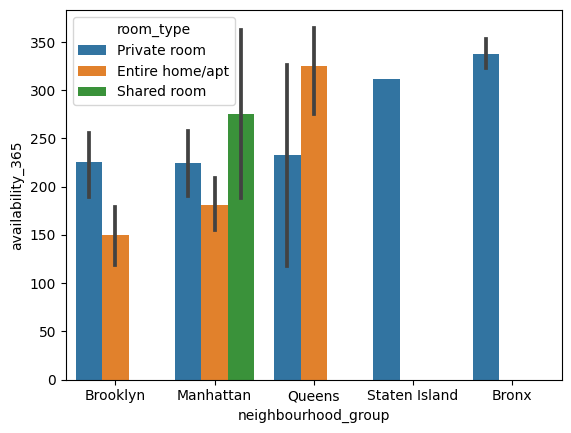

In [55]:
sns.barplot(y='availability_365',x='neighbourhood_group',hue='room_type',data=df_without_outlier)
# This barplot shows the average number of days the listing is available in different neighbourhoodcat

<Axes: xlabel='reviews_per_month', ylabel='Count'>

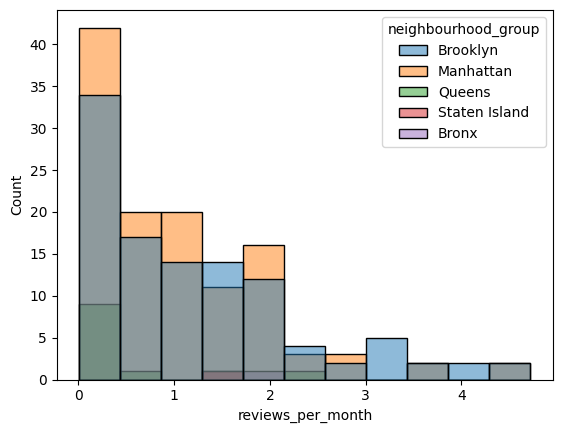

In [83]:
sns.histplot(x='reviews_per_month',hue='neighbourhood_group',data=df_without_outlier)
# This plot shows the most probable reviews per month count in different neighbourhood groups